## Graph manipulations: Example of the brain graph

Let us load the brain adjacency matrix $A$. We first load the matlab mat file.

In [10]:
import networkx as nx
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
#D = sp.io.loadmat('/Users/benjamin/Documents/MATLAB/Brain/PH0092_test_timeseries.mat')
D = sp.io.loadmat('PH0148_allscales_allnodes_with_labels.mat')
Dlobes = sp.io.loadmat('lobes_res83.mat')

Now the first mat file is stored in the dictionary $D$. Let us see what is inside $D$.

In [11]:
D.keys()

dict_keys(['SCb2', '__globals__', 'SCw5', 'labels', 'SCb1', 'SCb3', 'SCb4', 'SCw1', 'SCw3', 'SCb5', '__version__', 'SCw2', '__header__', 'SCw4'])

The adjacency matrices of 5 different graphs, corresponding to different numbers of nodes are stored in $SC$. We extract the first one (83 nodes) with the region labels and the lobes in $Dlobes$.

In [12]:
#Brain1=100*np.log(1+D['SCw1'])
Brain1=D['SCw1']
Brainalllabels=D['labels']
Brain1labels=Brainalllabels[0][0]

In [13]:
Dlobes.keys()

dict_keys(['lobes83', '__header__', '__globals__', '__version__'])

Let us create the networkx graph.

In [14]:
G1=nx.from_numpy_matrix(Brain1)

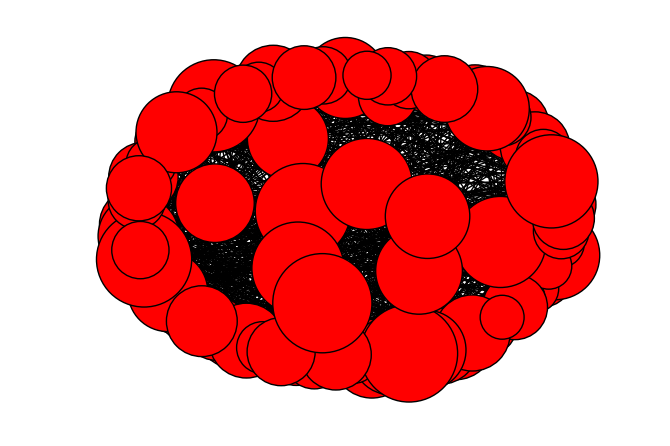

In [15]:
plt.figure(1)
dg = nx.degree(G1)
nx.draw(G1, nodelist=dg.keys(), node_size=[v * 100 for v in dg.values()])
plt.show()

We need some preprocessing for linking the name and numbering of the lobes to the nodes (13 main regions) :

In [16]:
LobesLabels=Dlobes['lobes83'][0][0][0][0]
Lobesloc=Dlobes['lobes83'][0][0][1]
lobes={} # for numbering the nodes according to the lobe they belong to
lobesnames = {} # name of the lobe for each node
l=0
for i in range(5):
    for k in range(Lobesloc[i][1]-Lobesloc[i][0]+1) :
        lobes[l]=i*2
        lobesnames[l]=LobesLabels[i][0]
        l=l+1
#add subcortical right
for k in range(41-34+1) :
    lobes[l]=10
    lobesnames[l]=u'subcortical_rx'
    l=l+1
# continue with the rest
for i in range(5):
    for k in range(Lobesloc[i][1]-Lobesloc[i][0]+1) :
        lobes[l]=(i*2+1)
        lobesnames[l]=LobesLabels[i+5][0]
        l=l+1
#add subcortical left
for k in range(82-75+1) :
    lobes[l]=11
    lobesnames[l]=u'subcortical_lx'
    l=l+1
lobes[82]=12
lobesnames[l]=u'brainstem'

In [17]:
lobes

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 4,
 16: 4,
 17: 4,
 18: 4,
 19: 4,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 8,
 25: 8,
 26: 8,
 27: 8,
 28: 8,
 29: 8,
 30: 8,
 31: 8,
 32: 8,
 33: 10,
 34: 10,
 35: 10,
 36: 10,
 37: 10,
 38: 10,
 39: 10,
 40: 10,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 3,
 53: 3,
 54: 3,
 55: 3,
 56: 5,
 57: 5,
 58: 5,
 59: 5,
 60: 5,
 61: 7,
 62: 7,
 63: 7,
 64: 7,
 65: 9,
 66: 9,
 67: 9,
 68: 9,
 69: 9,
 70: 9,
 71: 9,
 72: 9,
 73: 9,
 74: 11,
 75: 11,
 76: 11,
 77: 11,
 78: 11,
 79: 11,
 80: 11,
 81: 11,
 82: 12}

Rearanging the names to be recorded inside the graph and sorting left/right hemisphere regions:

In [18]:
Brain1labelsshort=Brain1labels[0][:][0].copy()
Brain1labs={} #dictionary for the full node labels
Labelsshort={} # dictionary for short node labels
hemisphere={} #hemisphere (left=1/right=2/no=0)
for i in range(len(Brain1)):
    Brain1labs[i]=Brain1labels[0][i][0]
    if Brain1labs[i][0:2]=='lh':
        hemisphere[i]=1
        Labelsshort[i]=Brain1labs[i][3:]
    elif Brain1labs[i][0:2]=='rh':
        hemisphere[i]=2
        Labelsshort[i]=Brain1labs[i][3:]
    else:
        hemisphere[i]=0
        Labelsshort[i]=Brain1labs[i]
        

In [19]:
deg = nx.degree(G1)
nx.set_node_attributes(G1,'degree',deg)
nx.set_node_attributes(G1,'name',Labelsshort)
nx.set_node_attributes(G1,'hemisphere',hemisphere)
nx.set_node_attributes(G1,'lobes',lobes)
nx.set_node_attributes(G1,'lobesnames',lobesnames)

We can also add some characteristics of the network like:

In [20]:
bb=nx.edge_betweenness_centrality(G1, normalized=False)
nx.set_edge_attributes(G1,'bb',bb)

### We now plot the brain graphs using D3 and javascript. 

Let us first import the json format for graphs

In [21]:
import json
from networkx.readwrite import json_graph

To visualize the result run in a terminal:
python3 -m http.server 8000 --bind 127.0.0.1

Now we import a simple method to create a web server.

In [ ]:
pwd

In [28]:
# write json formatted data
d1 = json_graph.node_link_data(G1) # node-link format to serialize
s = json.dumps(d1)
# write json
with open('force.json','w') as f:
    f.write(s)
#json.dump(d1, open('force.json','w'))
#json.dump(d2, open('brainviz/force.json','w'))
print('Wrote node-link JSON data')

Wrote node-link JSON data
